# Build the linear regression model using scikit learn in boston data to predict 
'Price' based on other dependent variable.


Here is the code to load the data:


import numpy as np


import pandas as pd


import scipy.stats as stats


import matplotlib.pyplot as plt


import sklearn


from sklearn.datasets import load_boston


boston = load_boston()


In [4]:
# import necessary libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [5]:
# load the Boston dataset
boston = load_boston()

In [6]:
# create a Pandas dataframe from the dataset
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [7]:
# add the target variable to the dataframe
df['Price'] = boston.target

In [8]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[boston.feature_names], df['Price'], test_size=0.3, random_state=42)

In [9]:
# create a linear regression model
model = LinearRegression()


In [10]:
# fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [11]:
# make predictions on the test data
y_pred = model.predict(X_test)


In [12]:
# evaluate the model using mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("R-squared score: ", r2)

Mean squared error:  21.517444231177336
R-squared score:  0.7112260057484916


# Lets do Hyperparameter Tuning

In [14]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [16]:
lasscv=LassoCV(alphas = None , max_iter =100,normalize=True)
lasscv.fit(X_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [17]:
#best alpha paremetere
alpha=lasscv.alpha_
alpha

0.0003722775328799811

In [18]:
#Now that we have best parameter,Lets use Lasso regression and see how well our data has fitted before
lasso_reg=Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.0003722775328799811)

In [19]:
lasso_reg.score(X_test,y_test)

0.7111579499091616

So, what its indicate now ,why we are trying Lasso regression beacuse we thought that linear regression is overfitted here also getting a same result which means that we either use a linear regression or lasso both are giving same .it means our model has not over fitted . so that conclusion is we can make here . our model is not over fitted.

# Using Ridge Regression Model

Ridge will return best alpha and coefficients after performing 10 Cross validation.

In [20]:
# Ridge will return best alpha and coefficients after performing 10 Cross validation

ridgecv=RidgeCV(alphas =np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [21]:
ridgecv.alpha_

0.020999999999999998

In [23]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.020999999999999998)

In [24]:
ridge_model.score(X_test,y_test)

0.7110350912621927

we got around same R2 using ridge regression as well . so its safe to say there is no overfitting

In [31]:
pred = ridge_model.predict(X_test)

# Best Fit Line

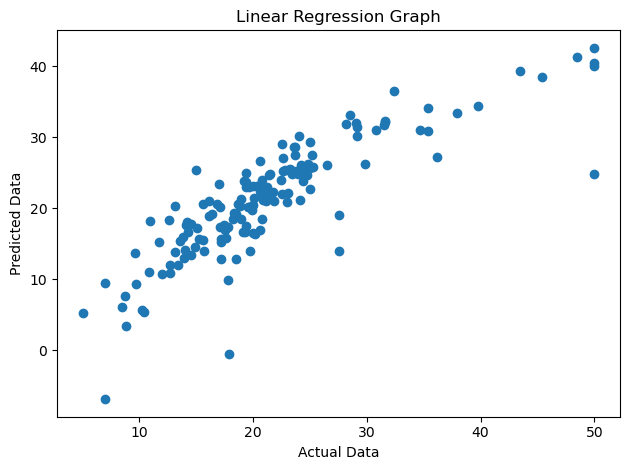

In [32]:
plt.scatter(y_test,pred,)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('Linear Regression Graph')
plt.tight_layout()

In [13]:
#Intern at Pranathi 
#Student of Datatrained- Saurav
#Date - 06-04-2023
#Time - 12:05